In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
# Set the plotting style to Solarize Light2
plt.style.use('Solarize_Light2')

In [118]:
# Read the data
covid = pd.read_csv("covid-data.csv")

In [119]:
# Convert 'date' column to datetime
data = pd.read_csv("covid-data.csv", usecols=["iso_code", "continent", "location", "date", "total_cases", "new_cases", "total_deaths", "new_deaths"]).dropna()

In [120]:
# Read data and drop NA values
data['date'] = pd.to_datetime(data['date'])

In [121]:
# Using describe function to understand data
data.describe()

,date,total_cases,new_cases,total_deaths,new_deaths
count,135421,1.354210e+05,1.354210e+05,135421.000000,135421.000000
mean,2021-03-24 22:53:47.109532672,7.273383e+05,3.273356e+03,14776.271029,44.031539
min,2020-01-23 00:00:00,1.000000e+00,0.000000e+00,1.000000,0.000000
25%,2020-10-01 00:00:00,4.963000e+03,5.000000e+00,70.000000,0.000000
50%,2021-03-31 00:00:00,3.728500e+04,1.130000e+02,630.000000,1.000000
75%,2021-09-18 00:00:00,2.865230e+05,9.880000e+02,5266.000000,13.000000
max,2022-03-05 00:00:00,7.926573e+07,1.368167e+06,958437.000000,4529.000000
std,NaN,3.395262e+06,1.903618e+04,59253.377313,194.200321


In [122]:
# Group by location and sum new cases
top_5 = data.groupby('location')['new_cases'].sum().nlargest(5)

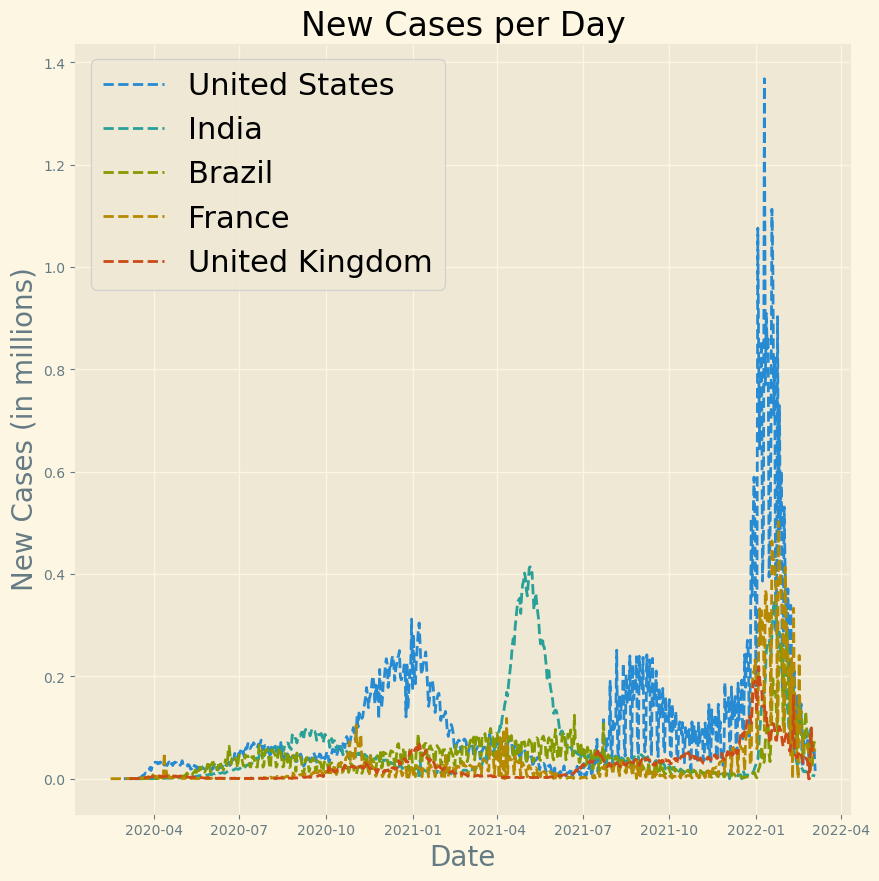

In [123]:
def plot_line_chart():
    """
    Function to create a line chart.
    """
    plt.figure(figsize=(10, 10))
    for country in top_5.index:
        country_data = data[data['location'] == country]
        plt.plot(country_data['date'], country_data['new_cases'] / 1e6, label=country, linestyle='dashed')
    plt.xlabel('Date', fontsize=20)
    plt.ylabel('New Cases (in millions)', fontsize=20)
    plt.title('New Cases per Day', fontsize=24)
    plt.legend(loc='upper left', fontsize=22)
    plt.savefig('line_chart', dpi=200)
    plt.show()

plot_line_chart()

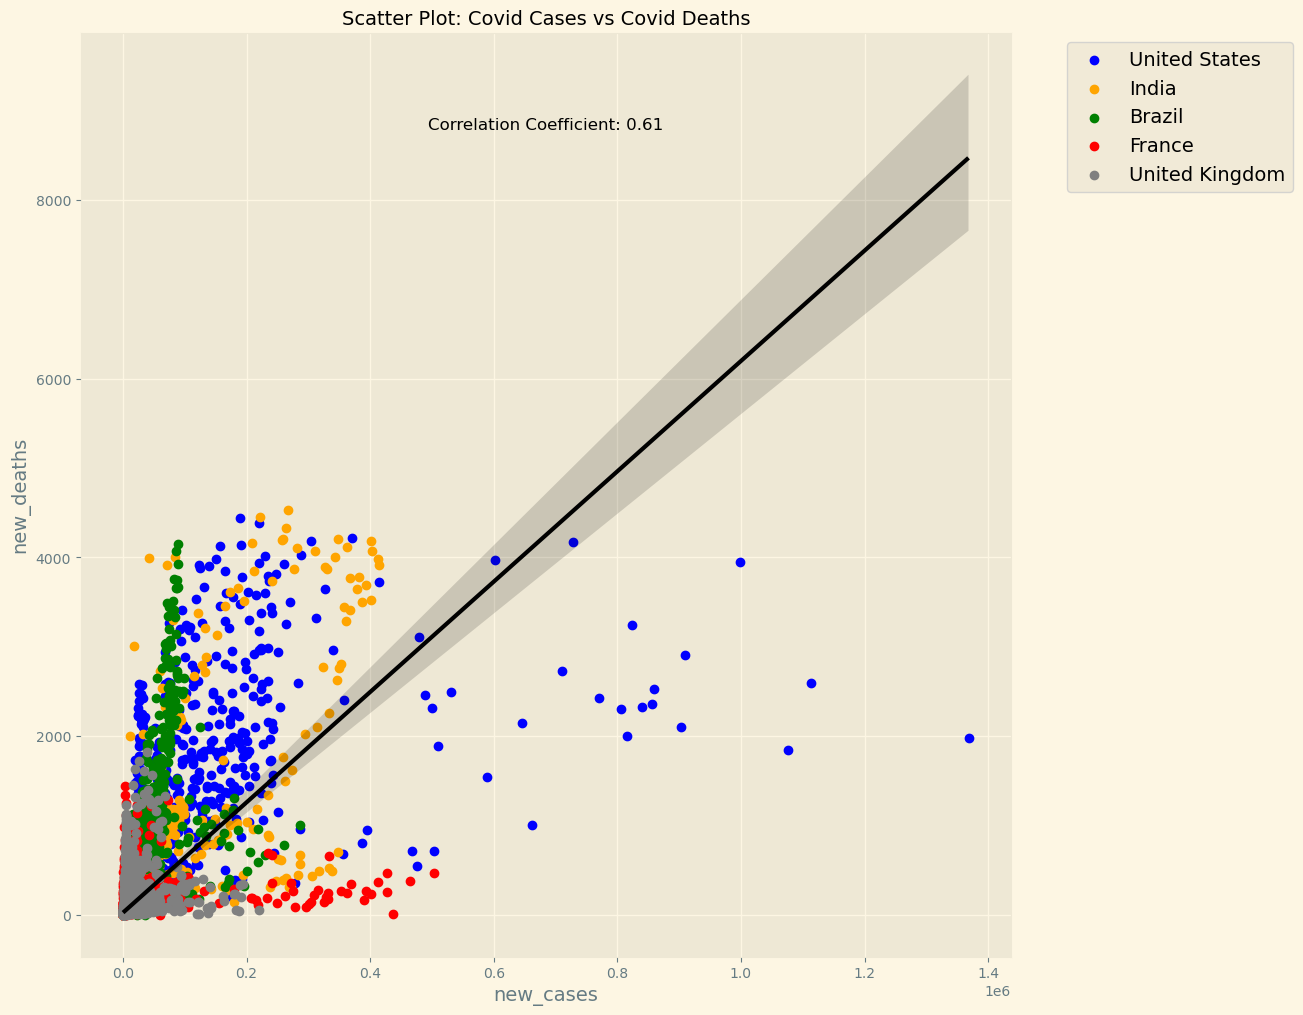

In [124]:
def plot_scatter_chart():
    """
    Function to create a scatter chart.
    """
    plt.figure(figsize=(12, 12))

    # Define colors for each country
    colors = ['blue', 'orange', 'green', 'red', 'gray']

    # Iterate over the top 5 countries and plot scatter points
    for i, country in enumerate(top_5.index):
        country_data = data[data['location'] == country]
        plt.scatter(country_data['new_cases'], country_data['new_deaths'], label=country, color=colors[i])

    # Set labels and title
    plt.xlabel('Covid Cases', fontsize=14)
    plt.ylabel('Covid Deaths', fontsize=14)
    plt.title('Scatter Plot: Covid Cases vs Covid Deaths', fontsize=14)

    # Add legend
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)

    # Statistical Analysis: Display correlation coefficient
    correlation = data[['new_cases', 'new_deaths']].corr().iloc[0, 1]
    plt.text(0.5, 0.9, f'Correlation Coefficient: {correlation:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)

    # Regression Line: Plot regression line
    sns.regplot(x=data['new_cases'], y=data['new_deaths'], scatter=False, color='black')
    plt.grid(True)
    plt.savefig("covid_cases_vs_covid_deaths.png", dpi=200, bbox_inches='tight')
    plt.show()

# Call the function
plot_scatter_chart()

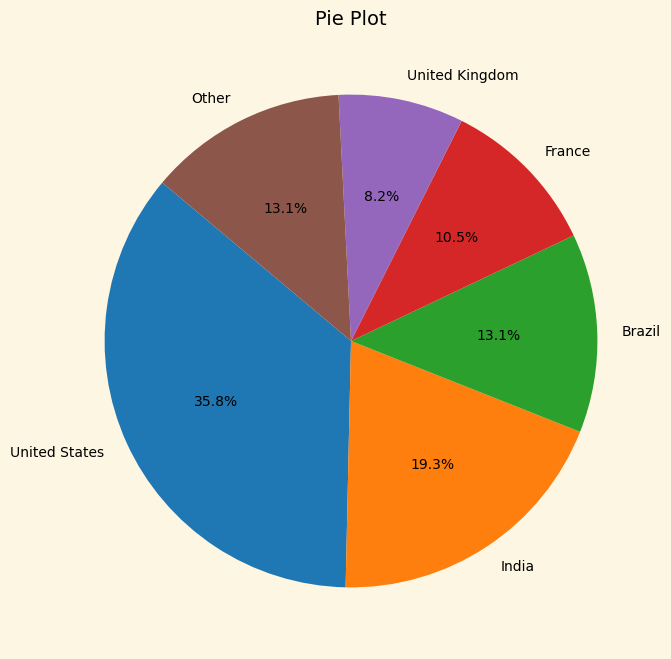

In [125]:
# Plot pie chart
def plot_pie_chart():
    """
    Function to create a pie chart.
    """
    plt.figure(figsize=(8, 8))
    plt.title('Pie Plot', fontsize=14)
    labels = data.groupby('location')['new_cases'].sum().nlargest(5) / data['new_cases'].sum() * 200
    labels['Other'] = 100 - labels.sum()
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
    plt.pie(labels, labels=labels.index, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.savefig("pie_chart.png", dpi=300)
    plt.show()

# Call the function
plot_pie_chart()

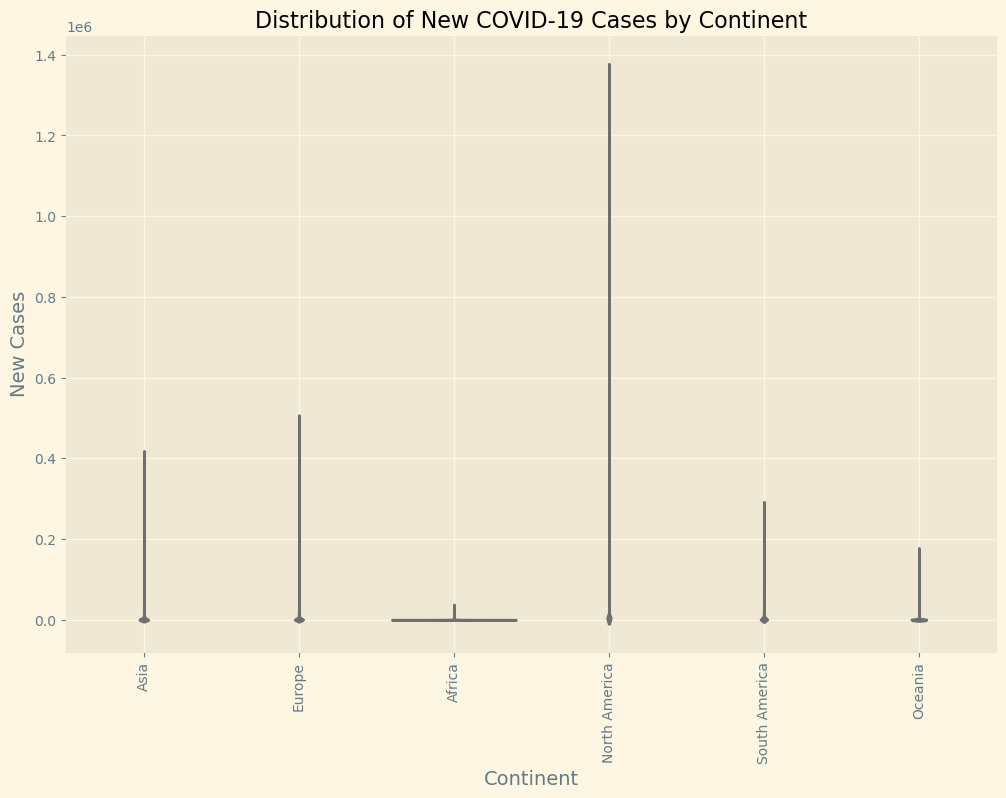

In [126]:
# Create a violin plot
def violin_plot():
    """
    Function to create a violin plot.
    """
    plt.figure(figsize=(12, 8))
    sns.violinplot(x='continent', y='new_cases', data=data, palette='pastel', inner='quartile')
    plt.xlabel('Continent', fontsize=14)
    plt.ylabel('New Cases', fontsize=14)
    plt.title('Distribution of New COVID-19 Cases by Continent', fontsize=16)
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.savefig("violin.png", dpi=300)
    plt.show()

# Call the function
violin_plot()